# `Flight Price Prediction`
## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

- Size of training set: 10683 records

- Size of test set: 2671 records

#### FEATURES:
- `Airline`: The name of the airline.

- `Date_of_Journey`: The date of the journey

- `Source`: The source from which the service begins.

- `Destination`: The destination where the service ends.

- `Route`: The route taken by the flight to reach the destination.

- `Dep_Time`: The time when the journey starts from the source.

- `Arrival_Time`: Time of arrival at the destination.

- `Duration`: Total duration of the flight.

- `Total_Stops`: Total stops between the source and destination.

- `Additional_Info`: Additional information about the flight
#### Target:-
- `Price`: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 



In [1]:
### importing necessary librabries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## loading the dataset:-
- `Note`:- We have excel file where data stored. So we have to use pandas.read_excel method to call the dataset.
- We have two dataset availbale , one for training pupose and second one is prediction.

let's first take only training dataset build a model.

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
pd.set_option('max_columns',None)
train_df.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5157,Vistara,27/05/2019,Delhi,Cochin,DEL → COK,14:40,17:50,3h 10m,non-stop,No info,6216
9533,Jet Airways,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,22:35 25 Mar,25h 25m,1 stop,In-flight meal not included,10031
5337,SpiceJet,27/06/2019,Delhi,Cochin,DEL → MAA → COK,06:05,11:20,5h 15m,1 stop,No info,5583
4512,IndiGo,9/06/2019,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,5644
8709,Air India,03/03/2019,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 07 Mar,26h 20m,2 stops,No info,12599
6619,Multiple carriers,24/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:00,14h 5m,1 stop,No info,10678
3822,IndiGo,18/04/2019,Banglore,Delhi,BLR → DEL,01:30,04:15,2h 45m,non-stop,No info,4591
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
369,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,6860
4653,Air India,12/06/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
## checking the shape of dataset:
train_df.shape

(10683, 11)

We have 10683 rows and 11 columns including target variable.

In [4]:
### checking the  nulls
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are two features having nulls. Though the number of NAN's is only two so we can drop them.

In [5]:
train_df.dropna(inplace=True)

In [6]:
train_df.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [7]:
## Checking the info 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


- We observe from above fuction that all the  features are in object data type. So we have to convert them into numerical data type. Because our models understand only number.
- As we can see that All date or time are object data type as well. So We have to convert them into data time format using Pandas df.time function.

In [8]:
train_df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- We can see that minimum price for any flight price is 1759 and maximum is 79512.

### Checking duplicates:

In [9]:
train_df.duplicated().any()

True

There are some duplicate present in our dataset. As if duplicates are present in our dataset so our model can be biased. So have to drop them.

In [10]:
### droping duplicates:
print("Previsous shape of Dataset : ", train_df.shape)
train_df.drop_duplicates(inplace=True)
print("\n After droping the duplicates, the new shape is : ", train_df.shape)

Previsous shape of Dataset :  (10682, 11)

 After droping the duplicates, the new shape is :  (10462, 11)


## EDA:

In [11]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<Figure size 432x504 with 0 Axes>

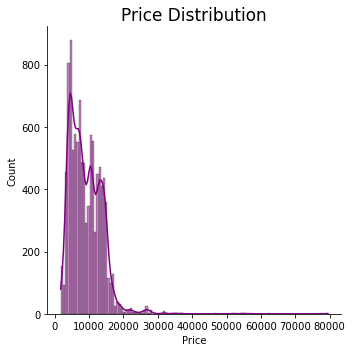

In [12]:
### Let's visulaize our target first:
plt.figure(figsize=(6,7))
sns.displot(train_df['Price'], kde=True,color='purple')
plt.title('Price Distribution',fontsize=17)
plt.tight_layout()

 Our target variable highly right skewed. Maximum price of flights falls in the range of 7000 to 15000.
 
 ### Airline:-

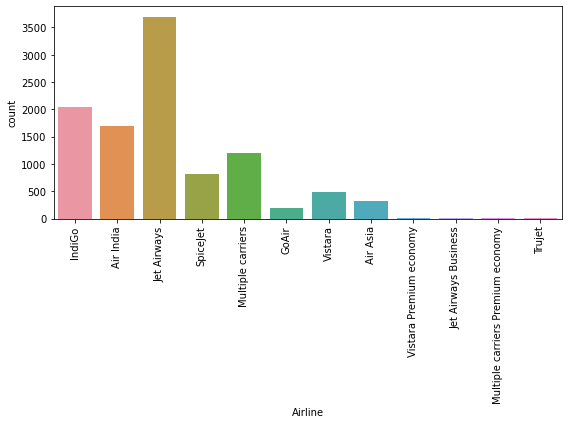

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Airline'])
plt.xticks(rotation=90)
plt.tight_layout()

- There are highest count of flights for Jet Airways Airlines.
- `Vistara Premium Economy`,`Jet Airways Business`,`Multiple Camers Premium Economy` and `Trujet` Airline has least count.
so We conclude that we will convert them with Other.

### Airtline Vs Price

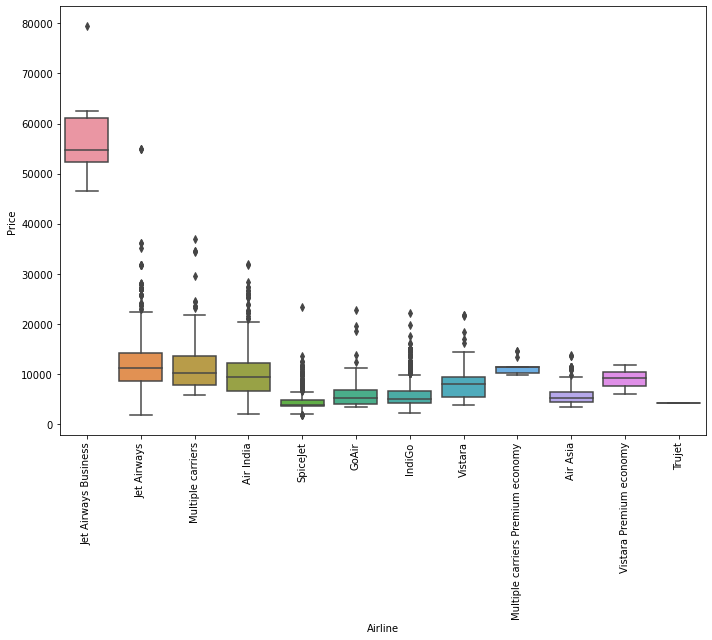

In [14]:
plt.figure(figsize=(10,9))
#sns.countplot(train_df['Airline'])
sns.boxplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()

In [15]:
train_df.Airline=train_df.Airline.replace({'Multiple carriers Premium economy':'Others',
                                           'Jet Airways Business':'Others',
                                           'Vistara Premium economy':'Others',
                                           'Trujet':'Others'})

- As we can see that `Jet Airways Business` has highest Price. This can be reason that it's flight counts are almost negligible.
- `Jet Airways` having least price any flight , so that it could be the reason for highest count of price.

### Source

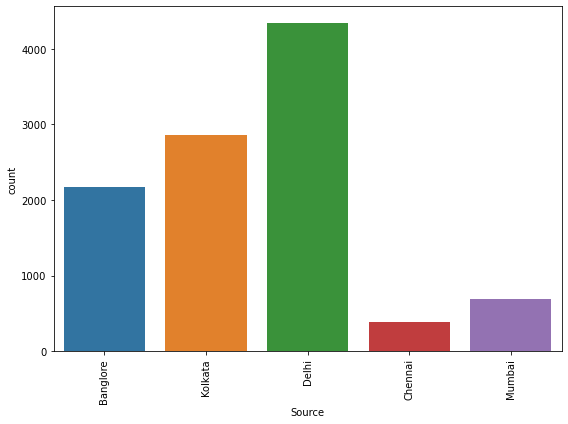

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Source'])
plt.xticks(rotation=90)
plt.tight_layout()

- Most of flight services begin from Delhi. This may be happen because Delhi city is one of the Top most metro city, it is hub of all the airlines. You may find any flight from here around the world.

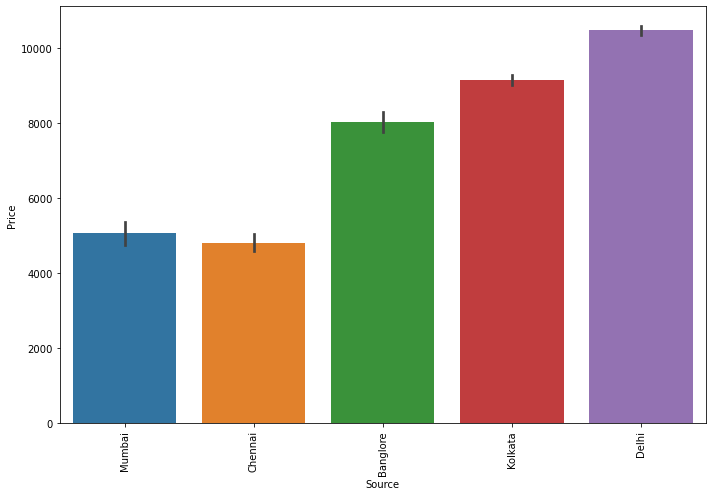

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=True))
plt.xticks(rotation=90)
plt.tight_layout()

- As All flight services begin from delhi for most times, that's why it may be reason that their flights price is high.
- The differece of Sources are not big so we can say that Source are not much effect for predicting the price of flights.

## Destination:

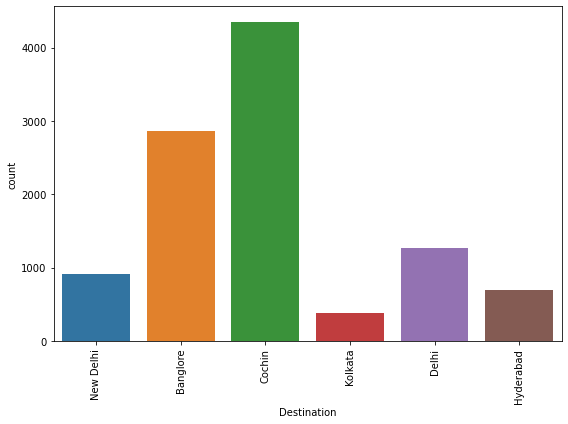

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Destination'])
plt.xticks(rotation=90)
plt.tight_layout()

- Most of flights end at Cochin.
- Kolkata has least count for flights end.

### Total Stops:-

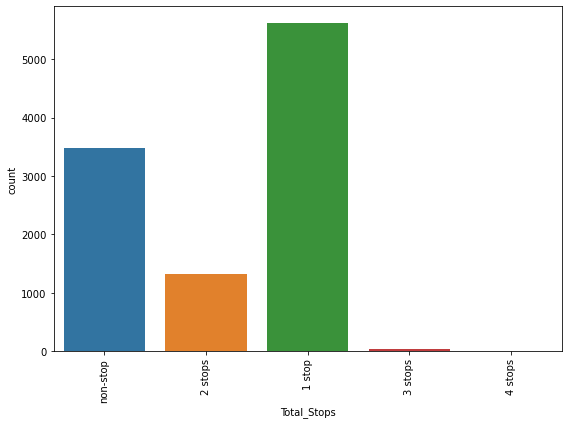

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(train_df['Total_Stops'])
plt.xticks(rotation=90)
plt.tight_layout()

- Most of flights do 1 stop during the whole journey.
- There is least number of chance that flights take 3 or 4 stops during the journey from source to destination.

### Relation between Total_Stops and Price

<Figure size 720x648 with 0 Axes>

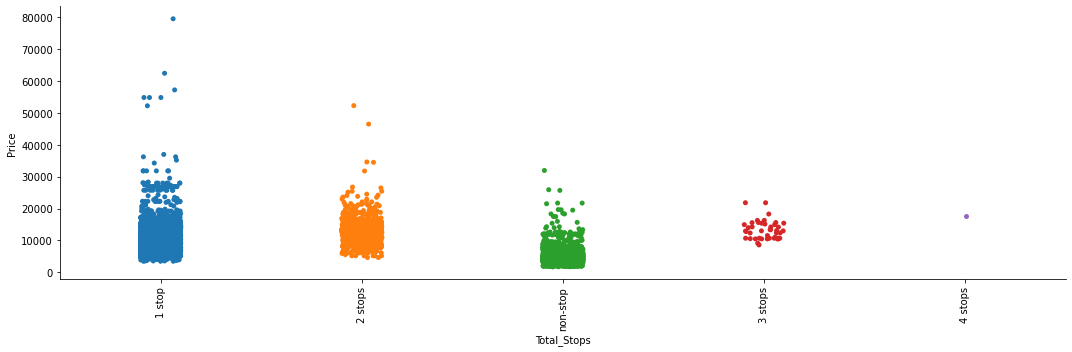

In [20]:
plt.figure(figsize=(10,9))
sns.catplot(x='Total_Stops',y='Price',data=train_df.sort_values('Price',ascending=False),height=5,aspect=3)
plt.xticks(rotation=90)
plt.tight_layout()

 - We can see that we can not find any up or down trend. So we can say that the number of stops from source to destination are not related to target variable.
 -  Usually we drop those column which are not related with target variable. But here we will not drop this column based on one evidence. It is just our assumtion.
 ### Additional Information

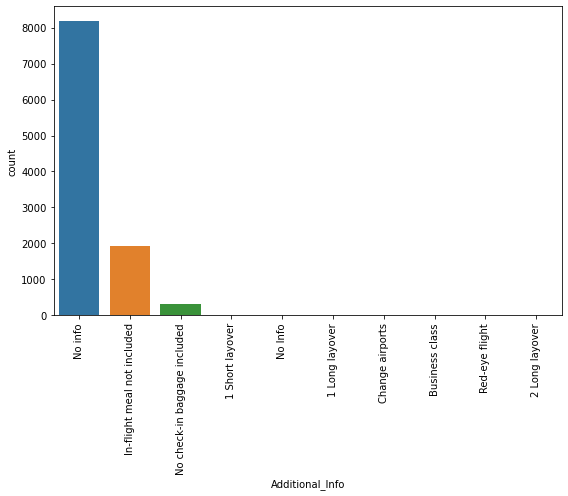

In [21]:
plt.figure(figsize=(8,7))
sns.countplot(train_df['Additional_Info'])
plt.xticks(rotation=90)
plt.tight_layout()

### Observations:-
- `No info` has highest count for Additional_info.
- There are `No info` and `No Info` have same meaning, so we will replace `NoInfo` to `No info`.
- `1Short layover`,`2Long layover`and `1 Long layover` attributes meanings are also same so that we will replace all of them with layover only.
##### `Layover`:- A layover is a stop between flights also called a connection. when your flight stops somewhere else en route to your final destination, it's called a layover. Connecting flights are flights that require passengers to leave the plane and board a different aircraft in order to reach their final destination.
- `layover`, `Change airports`,`Business class` and `Red-eye flight` attribute have least count. We will create mearge all of them with 'Others'. 

### Additional_Info vs Target:-

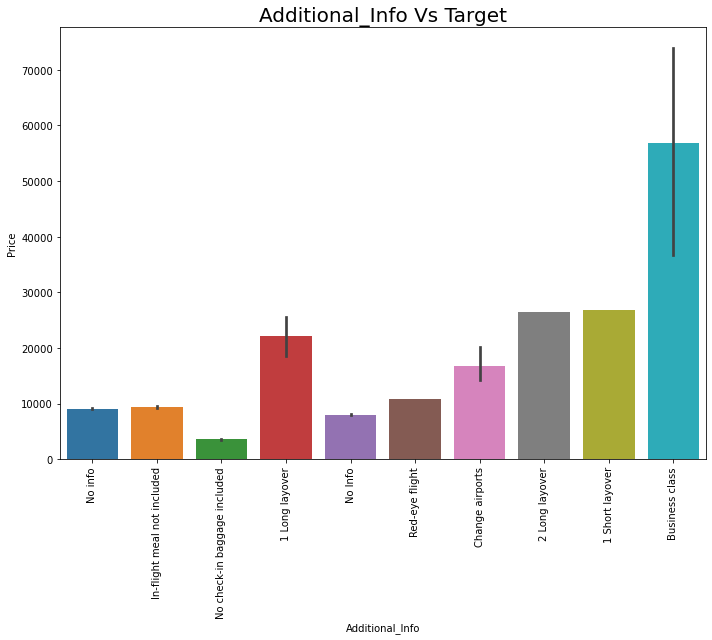

In [22]:
plt.figure(figsize=(10,9))
sns.barplot(x='Additional_Info',y='Price',data=train_df.sort_values('Price',ascending=True))
plt.xticks(rotation=90)
plt.title('Additional_Info Vs Target',fontsize=20)
plt.tight_layout()

### observations:-
- Business class flight's price has highest price and it is obvious that as business class flight's having good services and facilities therefore prices will also increases.
- All layovers have almost same prices.

 As All the features are object data type so we will first clean our dataset. 
 
 ## Cleaning Data:-

In [23]:
### checking the value count:
for i in train_df.columns:
    if train_df[i].dtypes=='object':
        print(i)
        print(train_df[i].value_counts())
        print("\n**************************************************************************\n")

Airline
Jet Airways          3700
IndiGo               2043
Air India            1694
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
GoAir                 194
Others                 23
Name: Airline, dtype: int64

**************************************************************************

Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
1/06/2019     330
24/06/2019    330
3/06/2019     326
24/03/2019    314
15/06/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
6/04/2019     100
09/03/2019    100
06/03/2019     95
27/04/2

- we observe that some attributes have same meaning in the `Additional_Info` column  but its name are different. We can replace them with single unique name as below mentioned details:-
- As `No info` and `No Info` have same meaning we will replace them with `No info`.
- `1 Long Layover`, `2Long Layover` and `1 Short layover` are same meaning we will replace them with `layover`.

In [24]:
train_df.Additional_Info=train_df.Additional_Info.replace({'No Info': 'No info',
                                                           '1 Long layover':'layover',
                                                           '2 Long layover': 'layover',
                                                           '1 Short layover': 'layover'})
train_df.Additional_Info.value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
layover                           21
Change airports                    7
Business class                     4
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [25]:
## replacing least count attributes with others:
train_df['Additional_Info'].replace({'Change airports':'Others',
                                    'Business class':'Others',
                                    'Red-eye flight':'Others'},inplace=True)

In [26]:
train_df.Additional_Info.value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
layover                           21
Others                            12
Name: Additional_Info, dtype: int64

In [27]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Date_of_Journey
as it is object data type so we will extract date month and year from the date so we can make that more inpretable.

we will use dt.date/dt.month/dt.year to extract them.

In [28]:
train_df['Journey_Day']=pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.day
train_df['Journey_Month']=pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.month

#### may be the year for  journey date is unique>> 
## let's extract first if it is unique then we will drop it
train_df['Journey_Year']=pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.year


In [29]:
train_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


### Duration:-
- duration is also in object type so we will convert total time into only hours.
- There are many ways to extract hour and min from the columns, but here we will simply use for loop to extract hour and minutes.

In [30]:
### extracting hours
hours=[]
for i in train_df.Duration:
    hours.append(i.split('h')[0])
print(len(hours))
## adding it into dataframe
train_df['Duration_Hours']=hours


10462


In [31]:
train_df.Duration_Hours.value_counts()

2     2387
1      621
3      500
7      487
5      481
9      445
12     426
8      424
13     381
11     365
10     355
6      340
14     337
15     262
23     240
16     234
4      222
26     214
24     195
25     183
22     181
27     174
21     172
20     161
18     130
17     128
19     125
28      93
29      50
30      49
38      31
37      17
33      10
32       9
35       7
34       7
31       6
36       5
42       2
47       2
41       1
40       1
5m       1
39       1
Name: Duration_Hours, dtype: int64

As we can see that there are one duration fill with '5m' it mean that 5 minutes.let's see that first.

In [32]:
train_df[train_df.Duration_Hours=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Hours
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,6,3,2019,5m


it is always possible that we can never reach mumbai to Hyderabad in 5 minutes. It could be wrong entry. so we will drop this row and move ahead.

In [33]:
train_df.Duration_Hours=train_df['Duration_Hours'].replace('5m',np.nan)
train_df.dropna(inplace=True)

In [34]:
train_df.Duration_Hours.value_counts()

2     2387
1      621
3      500
7      487
5      481
9      445
12     426
8      424
13     381
11     365
10     355
6      340
14     337
15     262
23     240
16     234
4      222
26     214
24     195
25     183
22     181
27     174
21     172
20     161
18     130
17     128
19     125
28      93
29      50
30      49
38      31
37      17
33      10
32       9
35       7
34       7
31       6
36       5
42       2
47       2
40       1
39       1
41       1
Name: Duration_Hours, dtype: int64

In [35]:
### extracting minutes:
minutes=[]
for i in train_df.Duration:
    if len(i)>=4:               ## checking if time has minutes present or not
        minutes.append(i.split(' ')[-1].replace('m',''))
    else:
        minutes.append('0')
print(len(minutes))
train_df['Duration_Minutes']=minutes

10461


In [36]:
train_df.Duration_Minutes.value_counts()

30    1421
0     1005
20     979
50     950
35     930
15     884
45     874
55     856
25     801
40     622
5      619
10     520
Name: Duration_Minutes, dtype: int64

In [37]:
## let's check that if we extract right minutes or not
x=[]
for i in train_df.Duration:
    if len(i)==2 or len(i)==3:
        x.append(i)

In [38]:
len(x)

1005

Great! as we can see that the length of x and count of 0 in Duration_Minutes ,both are same . let's move ahead.

In [39]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Hours,Duration_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,4,45


In [40]:
### Converting duration time into total hours:

train_df['Duration_Hours']=train_df['Duration_Hours'].astype(int)
train_df['Duration_Minutes']=train_df['Duration_Minutes'].astype(int)
## creating new column
train_df['Duration_Total_Hours']=train_df['Duration_Hours']+train_df['Duration_Minutes']/60 ### converting minute into Hours


In [41]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Hours,Duration_Minutes,Duration_Total_Hours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2,50,2.833333
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,7,25,7.416667


## Arrival_Time:
we will extract hours and minutes from Arrival_time with dt.hours/dt.minute method.

In [42]:
train_df['Arrival_Time_Hour']=pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_Time_Minute']=pd.to_datetime(train_df.Arrival_Time).dt.minute

### Dep_Time:
Similarly we will extract time from this column:

In [43]:
train_df['Dep_Time_Hour']=pd.to_datetime(train_df.Dep_Time).dt.hour
train_df['Dep_Time_Minute']=pd.to_datetime(train_df.Dep_Time).dt.minute

## Route:
checking value count first:

In [44]:
train_df.Route.value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1536
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → JDH → JAI → DEL → HYD             1
BOM → BBI → HYD                         1
BOM → JAI → DEL → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → BLR → CCU → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### Checking the relation between Route and Stops:

In [45]:
df=pd.DataFrame(train_df['Route'])
df['Stops']=train_df['Total_Stops']

In [46]:
df

,Route,Stops
0,BLR → DEL,non-stop
1,CCU → IXR → BBI → BLR,2 stops
2,DEL → LKO → BOM → COK,2 stops
3,CCU → NAG → BLR,1 stop
4,BLR → NAG → DEL,1 stop
...,...,...
10678,CCU → BLR,non-stop
10679,CCU → BLR,non-stop
10680,BLR → DEL,non-stop
10681,BLR → DEL,non-stop


AS We see that `Route` and `Total_Stops` are related with each other. So we will Drop `Route` column.

In [47]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Hours,Duration_Minutes,Duration_Total_Hours,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2,50,2.833333,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,7,25,7.416667,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,19,0,19.000000,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,5,25,5.416667,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,4,45,4.750000,21,35,16,50


### Dropping All Unwanted columns now:

In [48]:
train_df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],inplace=True)
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Duration_Hours,Duration_Minutes,Duration_Total_Hours,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,2,50,2.833333,1,10,22,20
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,7,25,7.416667,13,15,5,50
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,19,0,19.000000,4,25,9,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,5,25,5.416667,23,30,18,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,4,45,4.750000,21,35,16,50


In [49]:
train_df.Journey_Year.unique()

array([2019], dtype=int64)

In [50]:
### year is unique so we will drop it as well
train_df.drop('Journey_Year',axis=1,inplace=True)

### Duration_minutes and Duration_hours are useless as we already add both columns and make new column Duration_Total_hours
## so we will also drop them 
train_df.drop(columns=['Duration_Hours','Duration_Minutes'],inplace=True)
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_Total_Hours,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2.833333,1,10,22,20
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,7.416667,13,15,5,50
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,19.000000,4,25,9,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,5.416667,23,30,18,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,4.750000,21,35,16,50


In [51]:
### checking dtype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airline               10461 non-null  object 
 1   Source                10461 non-null  object 
 2   Destination           10461 non-null  object 
 3   Total_Stops           10461 non-null  object 
 4   Additional_Info       10461 non-null  object 
 5   Price                 10461 non-null  int64  
 6   Journey_Day           10461 non-null  int64  
 7   Journey_Month         10461 non-null  int64  
 8   Duration_Total_Hours  10461 non-null  float64
 9   Arrival_Time_Hour     10461 non-null  int64  
 10  Arrival_Time_Minute   10461 non-null  int64  
 11  Dep_Time_Hour         10461 non-null  int64  
 12  Dep_Time_Minute       10461 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.1+ MB


Let's Visualize new columns as well:

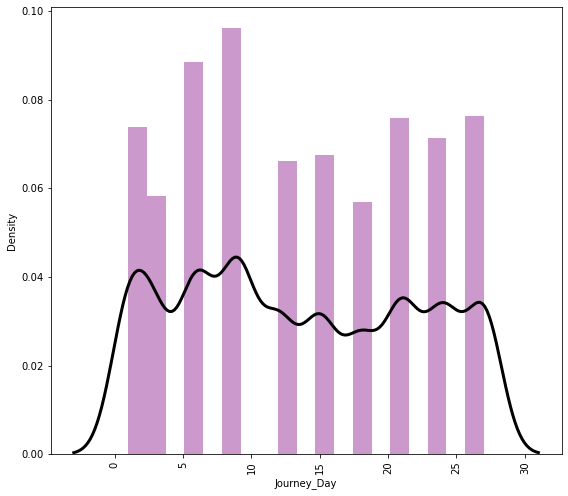

In [52]:
plt.figure(figsize=(8,7))
sns.distplot(train_df['Journey_Day'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

- Jouney_Day is quite equally distributed.

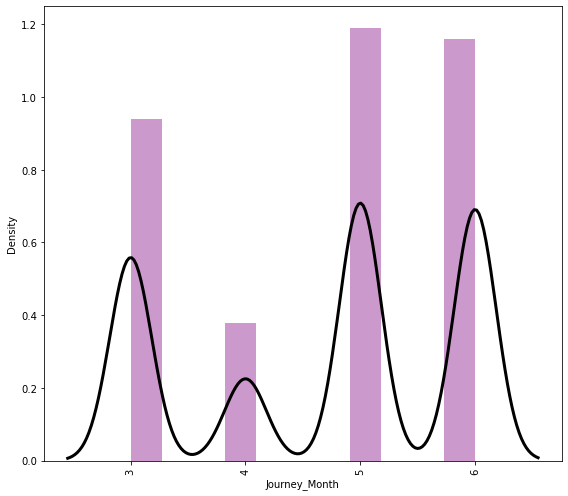

In [53]:
plt.figure(figsize=(8,7))
sns.distplot(train_df['Journey_Month'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

- Journey_Month is fine ditributed as well.

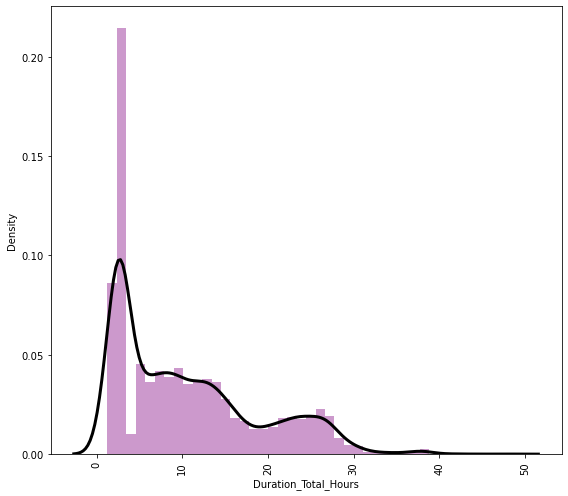

In [54]:
plt.figure(figsize=(8,7))
sns.distplot(train_df['Duration_Total_Hours'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

- Duration_Total_hours highly right skewed.
- We can see that there may be some flights distance beween source to destination  is numerous or May be it would be outliers. We will check ahead.

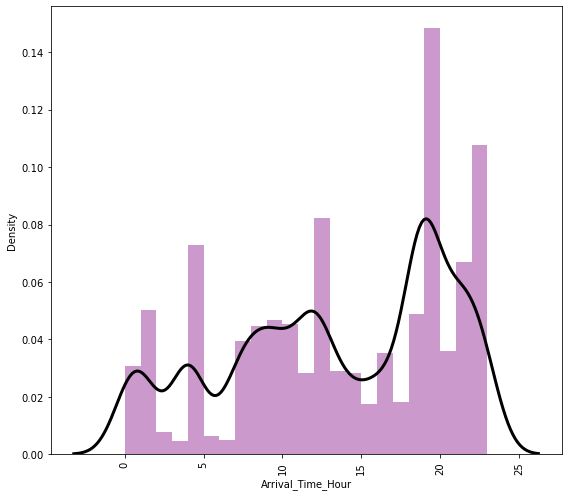

In [55]:
plt.figure(figsize=(8,7))
sns.distplot(train_df['Arrival_Time_Hour'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

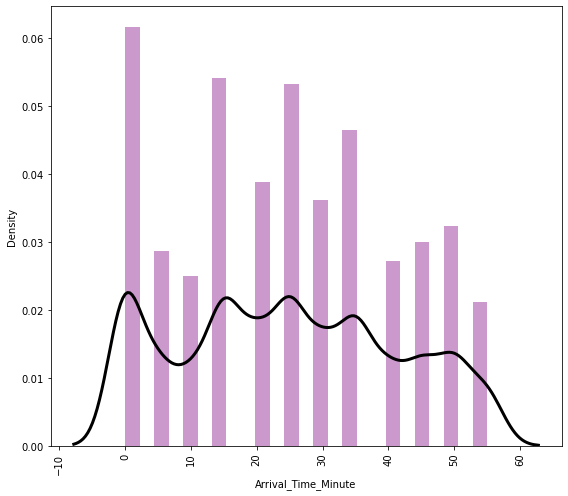

In [56]:
plt.figure(figsize=(8,7))
sns.distplot(train_df['Arrival_Time_Minute'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

- `Arrival_Time_Hour` and `Arrival_Time_Minute` are quite well distributed.
- All the graphs showing a good range.

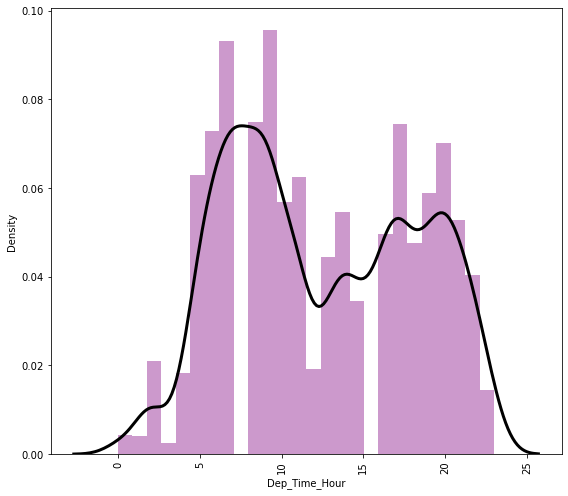

In [57]:
plt.figure(figsize=(8,7))
sns.distplot(train_df['Dep_Time_Hour'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

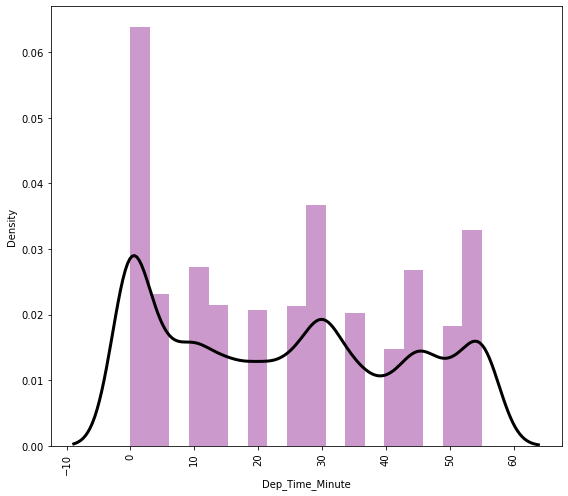

In [58]:
plt.figure(figsize=(8,7))
sns.distplot(train_df['Dep_Time_Minute'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

- `Depature_Time` is also Quite well Distributed.

## Checking Outlier:-

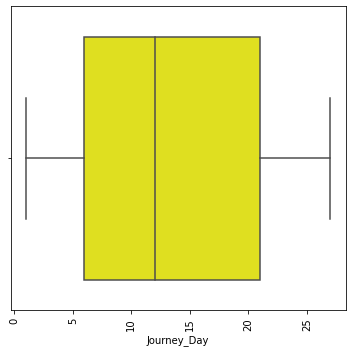

In [59]:
plt.figure(figsize=(5,5))
sns.boxplot(train_df['Journey_Day'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

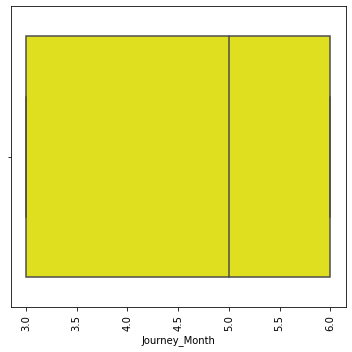

In [60]:
plt.figure(figsize=(5,5))
sns.boxplot(train_df['Journey_Month'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

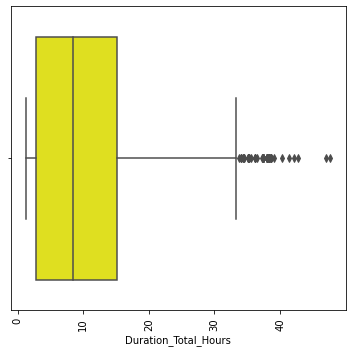

In [61]:
plt.figure(figsize=(5,5))
sns.boxplot(train_df['Duration_Total_Hours'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

- As we assume that Total Duration hours having Some outlier present . We will remove them a head.

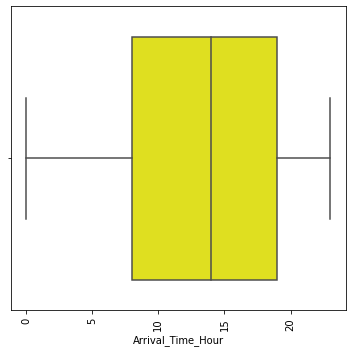

In [62]:
plt.figure(figsize=(5,5))
sns.boxplot(train_df['Arrival_Time_Hour'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

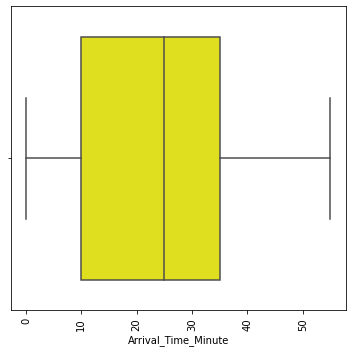

In [63]:
plt.figure(figsize=(5,5))
sns.boxplot(train_df['Arrival_Time_Minute'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

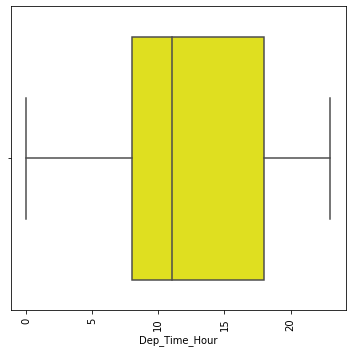

In [64]:
plt.figure(figsize=(5,5))
sns.boxplot(train_df['Dep_Time_Hour'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

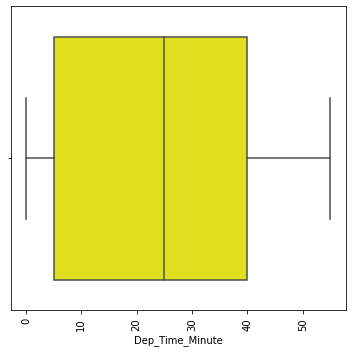

In [65]:
plt.figure(figsize=(5,5))
sns.boxplot(train_df['Dep_Time_Minute'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

Except Total Duration, there are no outliers present in any columns:

### Removing the Outliers:

In [66]:
from scipy.stats import zscore
z_score=zscore(train_df[['Duration_Total_Hours','Dep_Time_Minute','Dep_Time_Hour',
                         'Arrival_Time_Hour','Arrival_Time_Minute']])
abs_zscore=np.abs(z_score)



In [67]:
threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df_new=train_df[new_entry]
print("The shape before: ", train_df.shape)
print("The shape after: ",df_new.shape)

The shape before:  (10461, 13)
The shape after:  (10400, 13)


### Data loss

In [68]:
loss=(10461-10400)/10400*100
print("for removing the  outliers our data loss is : ",round(loss,1),'%')

for removing the  outliers our data loss is :  0.6 %


The data loss is very less, Let's move ahead.

## Checking Skewness:-

In [69]:
df_new.skew()

Price                   1.870209
Journey_Day             0.123165
Journey_Month          -0.385043
Duration_Total_Hours    0.815763
Arrival_Time_Hour      -0.371079
Arrival_Time_Minute     0.108035
Dep_Time_Hour           0.100090
Dep_Time_Minute         0.169608
dtype: float64

In [70]:
## Handling only continous type feature:
df_new.Duration_Total_Hours=np.sqrt(df_new['Duration_Total_Hours'])
print(df_new.skew())

Price                   1.870209
Journey_Day             0.123165
Journey_Month          -0.385043
Duration_Total_Hours    0.338702
Arrival_Time_Hour      -0.371079
Arrival_Time_Minute     0.108035
Dep_Time_Hour           0.100090
Dep_Time_Minute         0.169608
dtype: float64


## Heatmap:-

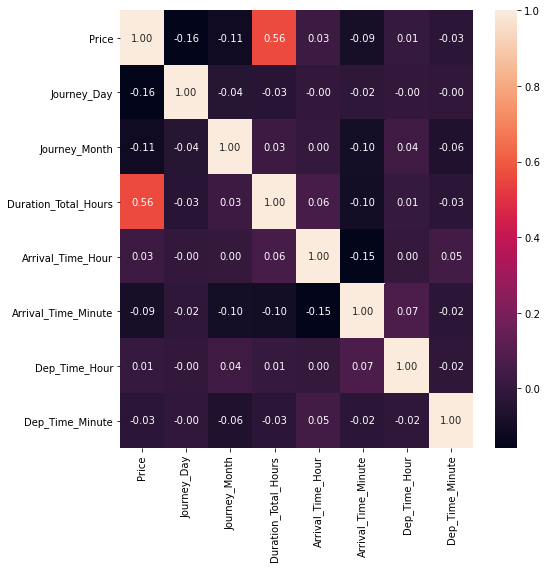

In [71]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True,
           linecolor='b',fmt='.2f')
plt.tight_layout()

### observations of Heatmap:-
- we can see that `Dep_Time_Minute`,`Arrival_Time_Minute`,`Journey_month` and `Journey_Day` are negatively correlated with our target variable.
- `Dep_Time_Hour`,`Arrival_Time_Hour` and `Duration_Total_Hours` are positively correated with target variable.
- `Duration_Total_Hours` is highest correlated with target as 56% positive correlation.
- None of the features are strongly  correlated with each other.It mean there is no multicollinearity problem exists.



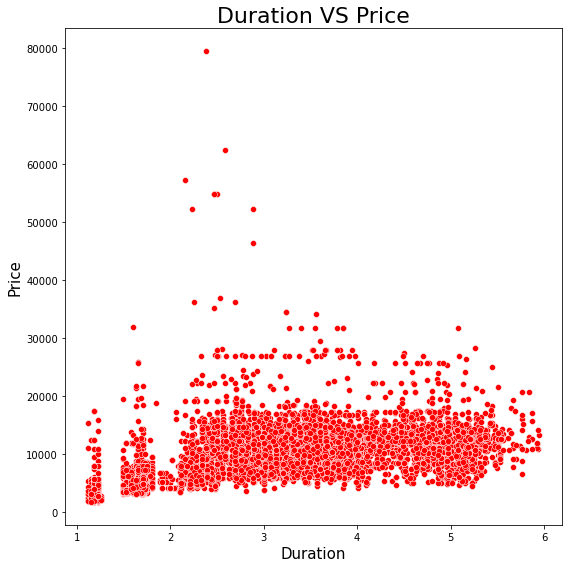

In [72]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_new['Duration_Total_Hours'],df_new['Price'],color='r')
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Duration VS Price',fontsize=22)
plt.tight_layout()

- We can see that there is relation beween price and Duration.

## Encoding:-
we will use pd.get dummies for categorical data:-

In [73]:
df1=pd.get_dummies(df_new[['Airline','Source','Destination','Total_Stops','Additional_Info']])
print(df1.shape)
df1.head(10)

(10400, 30)


,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Others,Additional_Info_layover
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [74]:
### merge the dataframe and dropping unwanted columns:
df=df_new.join(df1)
df.drop(columns=['Airline','Source','Destination','Total_Stops','Additional_Info'],inplace=True)
df.head()

,Price,Journey_Day,Journey_Month,Duration_Total_Hours,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Others,Additional_Info_layover
0,3897,24,3,1.683251,1,10,22,20,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,7662,1,5,2.723356,13,15,5,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,13882,9,6,4.358899,4,25,9,25,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,6218,12,5,2.327373,23,30,18,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,13302,1,3,2.179449,21,35,16,50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


In [75]:
df.shape

(10400, 38)

### Correlation with target:-

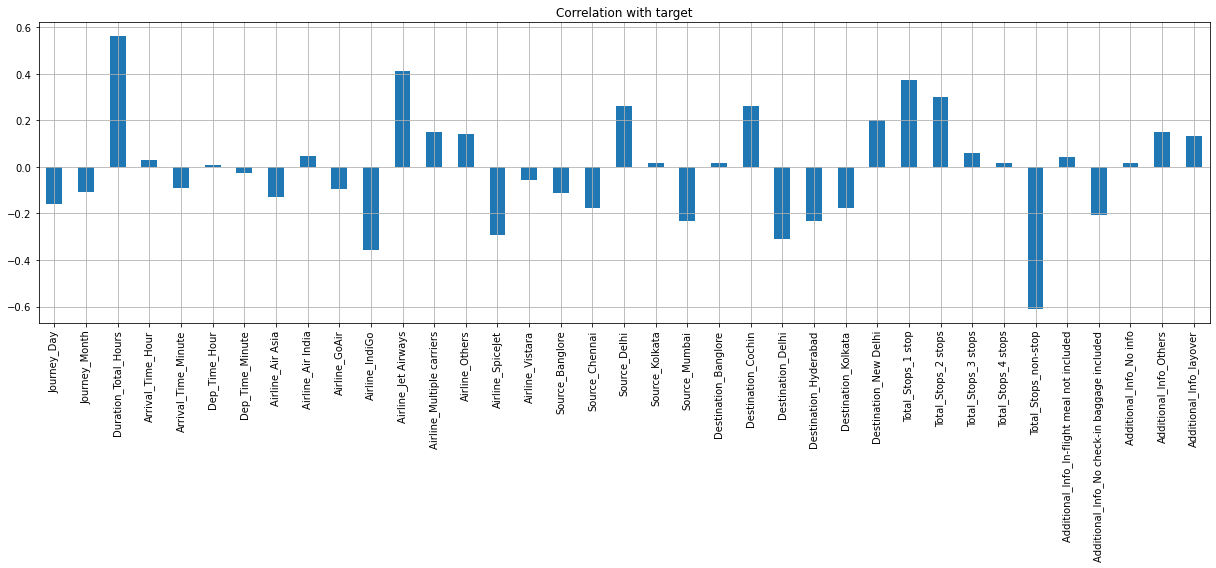

In [76]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(17,8),title='Correlation with target')
plt.tight_layout()

### ObservationS:-
- 'Duration','Ariline-Indigo','Airline-JetAirways','Destination-Delhi','Total_Stops1' and 'TotalStops-NonStops' are highly correlated with target variable.
- 'Dep_time_hour',dep_Time_Minute','Source_Kolkata','Destination_Banglore','Total_Stops4','AdditionalInfo-noinfo' are very less correalted with target variable.

We will use feature selection technique to select best feature:-
### Standard Scaler:-

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [78]:
### splitting the dataset:-
x=df.drop('Price',axis=1)
y=df.Price

In [79]:
## scaling
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head(10)

,Journey_Day,Journey_Month,Duration_Total_Hours,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Others,Additional_Info_layover
0,0.884615,0.000000,0.117115,0.043478,0.181818,0.956522,0.363636,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.666667,0.332630,0.565217,0.272727,0.217391,0.909091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.307692,1.000000,0.671522,0.173913,0.454545,0.391304,0.454545,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.423077,0.666667,0.250581,1.000000,0.545455,0.782609,0.090909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.000000,0.219930,0.913043,0.636364,0.695652,0.909091,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.884615,1.000000,0.090451,0.478261,0.454545,0.391304,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.423077,0.000000,0.584103,0.434783,0.454545,0.782609,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.719751,0.217391,0.090909,0.347826,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.423077,0.000000,0.814670,0.434783,0.454545,0.347826,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.000000,0.666667,0.348264,0.826087,0.272727,0.478261,0.454545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## PCA
We will apply PCA

In [80]:
from sklearn.decomposition import PCA
pca=PCA()

In [81]:
pca.fit_transform(x)

array([[-1.16885914e+00, -8.96248083e-01,  2.56023332e-01, ...,
        -4.04709697e-16,  6.15334564e-16,  6.85319070e-16],
       [-5.98941884e-01,  5.81202109e-01, -1.02260223e+00, ...,
        -8.92868321e-16,  1.88930980e-16, -1.35446412e-17],
       [ 8.45451004e-01, -3.23137901e-01,  1.98793871e-01, ...,
         1.63196502e-15, -5.05828901e-16, -8.42093692e-16],
       ...,
       [-1.07427516e+00, -5.23145269e-01,  8.87690768e-01, ...,
         1.32409190e-17,  5.30981841e-18, -2.57183313e-18],
       [-1.11016045e+00, -7.24091621e-01,  3.37775886e-01, ...,
         2.91224545e-17,  2.21856676e-17,  1.11503678e-17],
       [ 6.88160780e-01, -7.54282934e-01, -4.29456546e-01, ...,
         4.37933529e-17,  1.17445889e-17,  5.22158585e-18]])

### Plotting the scree plot:

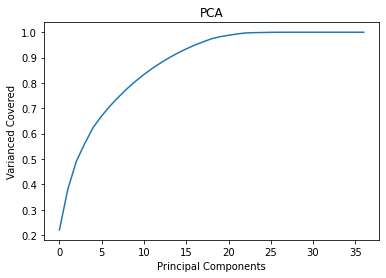

In [82]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()

we can see 22 Principal components are able to explain our data more than 95%. Hence we will take only 22 components.

In [83]:
pca=PCA(n_components=22)
new_comp=pca.fit_transform(x)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                     'PC21','PC22'])
x_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,-1.168859,-0.896248,0.256023,0.745421,-0.072395,0.327956,-0.595814,-0.565458,0.125769,0.206137,-0.075131,0.177768,-0.367666,-0.449927,-0.122547,-0.197836,0.728886,-0.191229,0.266584,-0.105631,0.011402,0.002840
1,-0.598942,0.581202,-1.022602,-0.487689,1.135195,-0.033472,-0.002528,-0.084957,-0.359401,-0.550739,0.170742,0.061770,0.236468,-0.410188,-0.020921,-0.188216,-0.260999,0.000729,0.005967,-0.018317,0.108774,0.081396
2,0.845451,-0.323138,0.198794,-0.786620,0.688048,-0.274143,-0.617659,0.372210,-0.330789,0.390100,0.461135,0.119453,-0.116944,-0.291987,0.072866,0.133904,-0.074046,-0.009609,0.075647,-0.009771,-0.026277,0.017618
3,-0.403441,0.812342,-1.039497,0.358335,-0.576591,-0.134124,-0.448829,-0.114000,0.293729,-0.289172,-0.198279,0.117752,0.074937,0.030720,-0.019207,0.394047,0.164194,0.015635,-0.232750,0.103039,0.043541,0.038552
4,-0.456124,-0.309703,0.050062,1.571604,0.020636,0.387587,-0.498301,-0.153119,-0.276985,-0.674471,0.185574,-0.073091,0.120438,-0.027631,0.114499,0.463259,0.334110,-0.101823,-0.085443,0.012719,0.038451,-0.015416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,-1.148737,0.402764,-0.694945,-0.244640,-0.067569,0.095636,0.161605,-0.114414,-0.637474,0.134870,-0.096374,-0.000690,0.725666,0.351589,-0.104883,-0.327667,0.340181,-0.161391,0.419534,0.713396,-0.193274,-0.070793
10396,-1.113554,0.334104,-0.852530,-0.367585,0.407081,0.157387,0.327408,-0.338862,-0.144067,0.044627,-0.806809,-0.006526,0.197022,0.409662,-0.232490,-0.462159,0.231378,-0.339681,0.142820,-0.248549,-0.017655,0.024139
10397,-1.074275,-0.523145,0.887691,0.236220,0.170688,-0.552008,-0.082970,0.229039,-0.047113,0.748584,-0.431799,0.063729,-0.053201,-0.057525,-0.169339,-0.256710,-0.383234,-0.046877,-0.152667,-0.047718,-0.062614,0.003082
10398,-1.110160,-0.724092,0.337776,0.838081,0.364360,0.205982,0.214767,-0.013413,-0.123771,-0.023703,0.343193,0.528912,0.262907,-0.054200,0.102433,0.011109,0.316682,0.342538,1.015708,-0.312834,-0.026603,-0.015153


So Now we will give model X_component not Xscaled for building the model.

### Building the Models:-
as it is a regression model so we will import regression models:
- Importing the models:-

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
### importing ensemble  models

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

### import metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [85]:
### importing train test
from sklearn.model_selection import train_test_split as tts

### findling the best random State:-


In [86]:
def random_state(Model,Feature,Target):
    max_score=0
    for i in range(1,51):
        x_train,x_test,y_train,y_test=tts(Feature,Target,test_size=0.25,random_state=i)
        Model.fit(x_train,y_train)
        Model.predict(x_train)
        test_pred=Model.predict(x_test)
        score=r2_score(y_test,test_pred)
        mse=MSE(y_test,test_pred)
        print("At Random_State {}, R2 Score is : {}, & Mean Squared Error is {} ".format(i,score,mse))
        if score>max_score:
            max_score=score
            j=i
    print("\n*******************Best Random State***********************\n ")        
    print(" Maximum Accuracy Score is : {} ".format(max_score))    
    print('\n')
    return j

### Define a function for Print training & testing Score:-

In [87]:
def score(model,feature,target,RandomState):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=RandomState)
    model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    train_score=round(r2_score(y_train,train_pred)*100,3)
    test_score=round(r2_score(y_test,test_pred)*100,3)
    mse=round(MSE(test_pred,y_test),4)
    mae=round(MAE(test_pred,y_test,),4)
    Rmse=np.sqrt(MSE(y_test,test_pred))           
    print("\n****************************Training R2 Score***************************\n")
    print("\n Training R2 Score is : ",train_score)
    print('\n \n')
    print("******************************Testing R2 Score****************************")
    print("\nTesting Accuracy Score is : ",test_score)
    print("Mean Squared Error is : ", mse)
    print("Mean Absolute Error is : ", mae)
    print("Squared of Mean Squared Error is : ",Rmse)

### Defining a function for Cross Validation:-

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
def cv_score(clf,X,Y,RandomState):
    x_train,x_test,y_train,y_test=tts(X,Y,test_size=.25,random_state=RandomState)
    clf.fit(x_train,y_train)
    clf.predict(x_train)
    y_pred=clf.predict(x_test)
    score=r2_score(y_test,y_pred)
    for i in range(2,11):
        cv_score=cross_val_score(clf,X,Y,scoring='r2',cv=i)
        print('At cv : ', i)
        print('Cross Validation score is : ', cv_score.mean())
        print('Testing Accuracy score is : ',score)
        print('\n')
    

## Linear Regression:-

In [92]:
## finding Best random State:-
random_state(LinearRegression(),x_comp,y)

At Random_State 1, R2 Score is : 0.6002267194958089, & Mean Squared Error is 8574828.038564498 
At Random_State 2, R2 Score is : 0.6233857740995004, & Mean Squared Error is 8147923.7321370095 
At Random_State 3, R2 Score is : 0.6081227519685413, & Mean Squared Error is 8100539.000375531 
At Random_State 4, R2 Score is : 0.6481573552053237, & Mean Squared Error is 7155839.479643753 
At Random_State 5, R2 Score is : 0.6023637707859409, & Mean Squared Error is 8875227.128523557 
At Random_State 6, R2 Score is : 0.6575052643048683, & Mean Squared Error is 6707172.06621662 
At Random_State 7, R2 Score is : 0.5933266578444631, & Mean Squared Error is 8761068.748814467 
At Random_State 8, R2 Score is : 0.581301177491463, & Mean Squared Error is 9543742.522490606 
At Random_State 9, R2 Score is : 0.6837937583648335, & Mean Squared Error is 6224428.473512265 
At Random_State 10, R2 Score is : 0.5892688933429082, & Mean Squared Error is 9190993.984145956 
At Random_State 11, R2 Score is : 0.6266

9

In [93]:
## printing scores:
score(LinearRegression(),x_comp,y,9)


****************************Training R2 Score***************************


 Training R2 Score is :  65.888

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  66.747
Mean Squared Error is :  6545676.2936
Mean Absolute Error is :  1761.6405
Squared of Mean Squared Error is :  2558.451933030513


### Cross Validation For Linear Regression:

In [94]:
cv_score(LinearRegression(),x_comp,y,9)

At cv :  2
Cross Validation score is :  0.6166481865361226
Testing Accuracy score is :  0.6837937583648335


At cv :  3
Cross Validation score is :  0.6172640095621188
Testing Accuracy score is :  0.6837937583648335


At cv :  4
Cross Validation score is :  0.6172941488453523
Testing Accuracy score is :  0.6837937583648335


At cv :  5
Cross Validation score is :  0.6174219981893352
Testing Accuracy score is :  0.6837937583648335


At cv :  6
Cross Validation score is :  0.619722370629589
Testing Accuracy score is :  0.6837937583648335


At cv :  7
Cross Validation score is :  0.6204951834729978
Testing Accuracy score is :  0.6837937583648335


At cv :  8
Cross Validation score is :  0.6191942308545961
Testing Accuracy score is :  0.6837937583648335


At cv :  9
Cross Validation score is :  0.6210536913096881
Testing Accuracy score is :  0.6837937583648335


At cv :  10
Cross Validation score is :  0.622693819028213
Testing Accuracy score is :  0.6837937583648335




- As we can see that Linear Regression Model is not performing well for our problem.
- After cross validation we found that our model get overfitted.
- Random state 9 selected.
- Best Cv score is 10 selected.

## KNN Model:

In [95]:
## finding Best random State:-
random_state(KNeighborsRegressor(),x_comp,y)

At Random_State 1, R2 Score is : 0.8137157919071091, & Mean Squared Error is 3995652.357461539 
At Random_State 2, R2 Score is : 0.8151945627093704, & Mean Squared Error is 3998204.275815384 
At Random_State 3, R2 Score is : 0.782987549235209, & Mean Squared Error is 4485888.960938461 
At Random_State 4, R2 Score is : 0.8077201480689371, & Mean Squared Error is 3910622.478384615 
At Random_State 5, R2 Score is : 0.8069319354407064, & Mean Squared Error is 4309272.642523076 
At Random_State 6, R2 Score is : 0.832130695068755, & Mean Squared Error is 3287432.4638153845 
At Random_State 7, R2 Score is : 0.8000426726645675, & Mean Squared Error is 4307732.300153846 
At Random_State 8, R2 Score is : 0.8007907782463758, & Mean Squared Error is 4540737.6814 
At Random_State 9, R2 Score is : 0.8498440443664661, & Mean Squared Error is 2955776.587076923 
At Random_State 10, R2 Score is : 0.7878709323237784, & Mean Squared Error is 4746845.206692308 
At Random_State 11, R2 Score is : 0.804538365

25

In [96]:
## printing scores:
score(KNeighborsRegressor(),x_comp,y,25)


****************************Training R2 Score***************************


 Training R2 Score is :  87.598

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  86.204
Mean Squared Error is :  2618590.8981
Mean Absolute Error is :  929.7145
Squared of Mean Squared Error is :  1618.2060740547515


### Cross Validation for KNN :

In [97]:
cv_score(KNeighborsRegressor(),x_comp,y,25)

At cv :  2
Cross Validation score is :  0.7665773483286735
Testing Accuracy score is :  0.853620332849357


At cv :  3
Cross Validation score is :  0.7777952130380936
Testing Accuracy score is :  0.853620332849357


At cv :  4
Cross Validation score is :  0.8050727330242244
Testing Accuracy score is :  0.853620332849357


At cv :  5
Cross Validation score is :  0.8124588677632797
Testing Accuracy score is :  0.853620332849357


At cv :  6
Cross Validation score is :  0.8182412133718892
Testing Accuracy score is :  0.853620332849357


At cv :  7
Cross Validation score is :  0.822614532669216
Testing Accuracy score is :  0.853620332849357


At cv :  8
Cross Validation score is :  0.8194549412191093
Testing Accuracy score is :  0.853620332849357


At cv :  9
Cross Validation score is :  0.8167449404485388
Testing Accuracy score is :  0.853620332849357


At cv :  10
Cross Validation score is :  0.8218519039347585
Testing Accuracy score is :  0.853620332849357




- We can after checking the cross validation we find that our model got little overfitted.
- Best Ranodm State is 25.
- Best CV score is 7.

## Decision Tree:-

In [98]:
## finding Best random State:-
random_state(DecisionTreeRegressor(),x_comp,y)

At Random_State 1, R2 Score is : 0.7284231127811459, & Mean Squared Error is 5825114.435395299 
At Random_State 2, R2 Score is : 0.7310062042351072, & Mean Squared Error is 5819591.458792735 
At Random_State 3, R2 Score is : 0.6825165633891752, & Mean Squared Error is 6562736.094423077 
At Random_State 4, R2 Score is : 0.6602125674045916, & Mean Squared Error is 6910658.388985042 
At Random_State 5, R2 Score is : 0.7388605017391248, & Mean Squared Error is 5828624.730384615 
At Random_State 6, R2 Score is : 0.7159715726250391, & Mean Squared Error is 5562209.679615385 
At Random_State 7, R2 Score is : 0.601618184630933, & Mean Squared Error is 8582442.247692307 
At Random_State 8, R2 Score is : 0.6752923974498972, & Mean Squared Error is 7401324.2627884615 
At Random_State 9, R2 Score is : 0.7491640987352246, & Mean Squared Error is 4937632.217307692 
At Random_State 10, R2 Score is : 0.6103264008339191, & Mean Squared Error is 8719786.857307693 
At Random_State 11, R2 Score is : 0.606

36

In [100]:
## printing scores:
score(DecisionTreeRegressor(),x,y,36)


****************************Training R2 Score***************************


 Training R2 Score is :  99.634

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  68.84
Mean Squared Error is :  6732681.9176
Mean Absolute Error is :  811.9379
Squared of Mean Squared Error is :  2594.741204358568


### Cross Validation for Decision :

In [101]:
cv_score(DecisionTreeRegressor(),x,y,36)

At cv :  2
Cross Validation score is :  0.7789647894898162
Testing Accuracy score is :  0.6896817451772161


At cv :  3
Cross Validation score is :  0.7578878462852204
Testing Accuracy score is :  0.6896817451772161


At cv :  4
Cross Validation score is :  0.8080522381349902
Testing Accuracy score is :  0.6896817451772161


At cv :  5
Cross Validation score is :  0.8138740859895496
Testing Accuracy score is :  0.6896817451772161


At cv :  6
Cross Validation score is :  0.8153238663769217
Testing Accuracy score is :  0.6896817451772161


At cv :  7
Cross Validation score is :  0.7932750317764252
Testing Accuracy score is :  0.6896817451772161


At cv :  8
Cross Validation score is :  0.812930095092189
Testing Accuracy score is :  0.6896817451772161


At cv :  9
Cross Validation score is :  0.8179109892329598
Testing Accuracy score is :  0.6896817451772161


At cv :  10
Cross Validation score is :  0.8256511956346418
Testing Accuracy score is :  0.6896817451772161




- we see that model got underfitted.
- best random state for Decision Tree is 36 selected.
- cv= 10 selected for Decision Tree.

## SVR

In [102]:
## finding Best random State:-
random_state(SVR(),x_comp,y)

At Random_State 1, R2 Score is : 0.060908501953758076, & Mean Squared Error is 20142787.17694348 
At Random_State 2, R2 Score is : 0.06163982888373465, & Mean Squared Error is 20301110.743358724 
At Random_State 3, R2 Score is : 0.060634218159203335, & Mean Squared Error is 19417736.52245503 
At Random_State 4, R2 Score is : 0.061524152444293545, & Mean Squared Error is 19086891.881881595 
At Random_State 5, R2 Score is : 0.05431113987175418, & Mean Squared Error is 21107743.233412527 
At Random_State 6, R2 Score is : 0.05495129826854095, & Mean Squared Error is 18507158.192089032 
At Random_State 7, R2 Score is : 0.05155766064148204, & Mean Squared Error is 20432538.05465416 
At Random_State 8, R2 Score is : 0.039411919374818694, & Mean Squared Error is 21895464.7561094 
At Random_State 9, R2 Score is : 0.061417913545043, & Mean Squared Error is 18475717.093527034 
At Random_State 10, R2 Score is : 0.06057001114949401, & Mean Squared Error is 21021771.266182285 
At Random_State 11, R2

40

In [103]:
## printing scores:
score(SVR(),x_comp,y,40)


****************************Training R2 Score***************************


 Training R2 Score is :  5.783

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  8.139
Mean Squared Error is :  18216763.564
Mean Absolute Error is :  3296.3176
Squared of Mean Squared Error is :  4268.110069336728


### Cross Validation For SVR

In [104]:
cv_score(SVR(),x,y,40)

At cv :  2
Cross Validation score is :  0.03247318676396782
Testing Accuracy score is :  0.08138919079814677


At cv :  3
Cross Validation score is :  0.052588663130033
Testing Accuracy score is :  0.08138919079814677


At cv :  4
Cross Validation score is :  0.060845271548189306
Testing Accuracy score is :  0.08138919079814677


At cv :  5
Cross Validation score is :  0.06507170327152803
Testing Accuracy score is :  0.08138919079814677


At cv :  6
Cross Validation score is :  0.06853042760496714
Testing Accuracy score is :  0.08138919079814677


At cv :  7
Cross Validation score is :  0.07133652701443058
Testing Accuracy score is :  0.08138919079814677


At cv :  8
Cross Validation score is :  0.07285746390877054
Testing Accuracy score is :  0.08138919079814677


At cv :  9
Cross Validation score is :  0.07392752148409654
Testing Accuracy score is :  0.08138919079814677


At cv :  10
Cross Validation score is :  0.07556531160148969
Testing Accuracy score is :  0.08138919079814677




## `SVR is Not performing well`

## Random Forest Regressor:

In [90]:
## finding Best random State:-
random_state(RandomForestRegressor(),x_comp,y)

At Random_State 1, R2 Score is : 0.8470819021820534, & Mean Squared Error is 3279975.0676672105 
At Random_State 2, R2 Score is : 0.8359830264402665, & Mean Squared Error is 3548452.7652806016 
At Random_State 3, R2 Score is : 0.8197487199032157, & Mean Squared Error is 3725994.636397975 
At Random_State 4, R2 Score is : 0.8379978491111774, & Mean Squared Error is 3294829.1068979083 
At Random_State 5, R2 Score is : 0.8334654060853265, & Mean Squared Error is 3717046.479065912 
At Random_State 6, R2 Score is : 0.856787436761277, & Mean Squared Error is 2804572.460760592 
At Random_State 7, R2 Score is : 0.8103065258521518, & Mean Squared Error is 4086615.4624296455 
At Random_State 8, R2 Score is : 0.8221240511345785, & Mean Squared Error is 4054471.0556970215 
At Random_State 9, R2 Score is : 0.877571462342264, & Mean Squared Error is 2409970.378277726 
At Random_State 10, R2 Score is : 0.7962942527648564, & Mean Squared Error is 4558355.252448068 
At Random_State 11, R2 Score is : 0.

9

In [91]:
## printing scores:
score(RandomForestRegressor(),x_comp,y,9)


****************************Training R2 Score***************************


 Training R2 Score is :  97.977

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  90.856
Mean Squared Error is :  1799922.0745
Mean Absolute Error is :  659.2295
Squared of Mean Squared Error is :  1341.6117450794627


### Cross Validation For RandomForest:

In [92]:
cv_score(RandomForestRegressor(),x,y,9)

At cv :  2
Cross Validation score is :  0.8646931594028653
Testing Accuracy score is :  0.9074796761212489


At cv :  3
Cross Validation score is :  0.8664301586421231
Testing Accuracy score is :  0.9074796761212489


At cv :  4
Cross Validation score is :  0.881430237695185
Testing Accuracy score is :  0.9074796761212489


At cv :  5
Cross Validation score is :  0.8849914028398486
Testing Accuracy score is :  0.9074796761212489


At cv :  6
Cross Validation score is :  0.8839922657115121
Testing Accuracy score is :  0.9074796761212489


At cv :  7
Cross Validation score is :  0.8852135489446578
Testing Accuracy score is :  0.9074796761212489


At cv :  8
Cross Validation score is :  0.8842997718904813
Testing Accuracy score is :  0.9074796761212489


At cv :  9
Cross Validation score is :  0.8895341801148035
Testing Accuracy score is :  0.9074796761212489


At cv :  10
Cross Validation score is :  0.8900939008846992
Testing Accuracy score is :  0.9074796761212489




As we can see that our model got little overfitted.
- best random state=9
- cv= 10 selected

## Ada Boost:

In [93]:
## finding Best random State:-
random_state(AdaBoostRegressor(),x_comp,y)

At Random_State 1, R2 Score is : 0.2720630515304293, & Mean Squared Error is 15613685.207204625 
At Random_State 2, R2 Score is : 0.1945185982219767, & Mean Squared Error is 17426322.687757596 
At Random_State 3, R2 Score is : 0.28624842531841044, & Mean Squared Error is 14754039.680363175 
At Random_State 4, R2 Score is : 0.20993366826517235, & Mean Squared Error is 16068512.250596127 
At Random_State 5, R2 Score is : 0.32946106677381126, & Mean Squared Error is 14966406.211685054 
At Random_State 6, R2 Score is : 0.1670664997119169, & Mean Squared Error is 16311574.234300485 
At Random_State 7, R2 Score is : 0.24334611202688605, & Mean Squared Error is 16300789.957003966 
At Random_State 8, R2 Score is : 0.3682107978919221, & Mean Squared Error is 14400884.71537637 
At Random_State 9, R2 Score is : 0.03482830404589732, & Mean Squared Error is 18999125.871324062 
At Random_State 10, R2 Score is : 0.2110342845781603, & Mean Squared Error is 17654808.77053103 
At Random_State 11, R2 Sco

49

In [94]:
## printing scores:
score(AdaBoostRegressor(),x_comp,y,49)


****************************Training R2 Score***************************


 Training R2 Score is :  57.182

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  49.501
Mean Squared Error is :  11618042.7498
Mean Absolute Error is :  2409.2842
Squared of Mean Squared Error is :  3408.5250108809796


### Cross Validation for AdaBoost:

In [95]:
cv_score(AdaBoostRegressor(),x_comp,y,49)

At cv :  2
Cross Validation score is :  0.34927552922059685
Testing Accuracy score is :  0.3316388424872021


At cv :  3
Cross Validation score is :  0.3003342358475169
Testing Accuracy score is :  0.3316388424872021


At cv :  4
Cross Validation score is :  0.31836472214770234
Testing Accuracy score is :  0.3316388424872021


At cv :  5
Cross Validation score is :  0.2337079374340317
Testing Accuracy score is :  0.3316388424872021


At cv :  6
Cross Validation score is :  0.2232919105071196
Testing Accuracy score is :  0.3316388424872021


At cv :  7
Cross Validation score is :  0.21825298841204338
Testing Accuracy score is :  0.3316388424872021


At cv :  8
Cross Validation score is :  0.24115368673219892
Testing Accuracy score is :  0.3316388424872021


At cv :  9
Cross Validation score is :  0.21712845684775386
Testing Accuracy score is :  0.3316388424872021


At cv :  10
Cross Validation score is :  0.21546009556851947
Testing Accuracy score is :  0.3316388424872021




## `Ada Boost is also not performing well.`

## Gradient Boosting:

In [96]:
## finding Best random State:-
random_state(GradientBoostingRegressor(),x_comp,y)

At Random_State 1, R2 Score is : 0.7334229082438983, & Mean Squared Error is 5717872.685103667 
At Random_State 2, R2 Score is : 0.7397084826161273, & Mean Squared Error is 5631320.555390618 
At Random_State 3, R2 Score is : 0.7265527338543627, & Mean Squared Error is 5652459.4246946 
At Random_State 4, R2 Score is : 0.7522542392545242, & Mean Squared Error is 5038698.184784893 
At Random_State 5, R2 Score is : 0.7595493831150355, & Mean Squared Error is 5366849.600866824 
At Random_State 6, R2 Score is : 0.7663773523333721, & Mean Squared Error is 4575098.923155352 
At Random_State 7, R2 Score is : 0.7152885956401102, & Mean Squared Error is 6133611.251593933 
At Random_State 8, R2 Score is : 0.7056571126176274, & Mean Squared Error is 6709196.633688972 
At Random_State 9, R2 Score is : 0.7884062916393407, & Mean Squared Error is 4165160.9921594416 
At Random_State 10, R2 Score is : 0.7427971892106711, & Mean Squared Error is 5755467.380861781 
At Random_State 11, R2 Score is : 0.7224

9

In [97]:
## printing scores:
score(GradientBoostingRegressor(),x_comp,y,9)


****************************Training R2 Score***************************


 Training R2 Score is :  82.4

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  81.917
Mean Squared Error is :  3559554.6321
Mean Absolute Error is :  1253.4308
Squared of Mean Squared Error is :  1886.6782004507843


### Cross Validation for Gradient Boosting:

In [98]:
cv_score(GradientBoostingRegressor(),x_comp,y,9)

At cv :  2
Cross Validation score is :  0.7155395323925944
Testing Accuracy score is :  0.7892327549300915


At cv :  3
Cross Validation score is :  0.7250086982702223
Testing Accuracy score is :  0.7892327549300915


At cv :  4
Cross Validation score is :  0.7455225083801752
Testing Accuracy score is :  0.7892327549300915


At cv :  5
Cross Validation score is :  0.7470017207551527
Testing Accuracy score is :  0.7892327549300915


At cv :  6
Cross Validation score is :  0.740417462937347
Testing Accuracy score is :  0.7892327549300915


At cv :  7
Cross Validation score is :  0.7482124355590326
Testing Accuracy score is :  0.7892327549300915


At cv :  8
Cross Validation score is :  0.7445895319431498
Testing Accuracy score is :  0.7892327549300915


At cv :  9
Cross Validation score is :  0.7492528715144988
Testing Accuracy score is :  0.7892327549300915


At cv :  10
Cross Validation score is :  0.7461929996114278
Testing Accuracy score is :  0.7892327549300915




- Best random State is 9
- Best cv =9 selected.

## XGBoost:

In [99]:
## finding Best random State:-
random_state(XGBRegressor(),x_comp,y)

At Random_State 1, R2 Score is : 0.8501264525618402, & Mean Squared Error is 3214671.81396178 
At Random_State 2, R2 Score is : 0.8224712356605528, & Mean Squared Error is 3840775.872551607 
At Random_State 3, R2 Score is : 0.7874938755112618, & Mean Squared Error is 4392738.179843223 
At Random_State 4, R2 Score is : 0.819326815250856, & Mean Squared Error is 3674563.9775854037 
At Random_State 5, R2 Score is : 0.845106971594206, & Mean Squared Error is 3457207.1323667704 
At Random_State 6, R2 Score is : 0.8494168570195155, & Mean Squared Error is 2948912.6254507992 
At Random_State 7, R2 Score is : 0.832515098039022, & Mean Squared Error is 3608170.461065962 
At Random_State 8, R2 Score is : 0.8113747915361021, & Mean Squared Error is 4299487.665250963 
At Random_State 9, R2 Score is : 0.8773799973825539, & Mean Squared Error is 2413739.3106705113 
At Random_State 10, R2 Score is : 0.8332564941096824, & Mean Squared Error is 3731245.417486214 
At Random_State 11, R2 Score is : 0.779

25

In [100]:
## printing scores:
score(XGBRegressor(),x_comp,y,25)


****************************Training R2 Score***************************


 Training R2 Score is :  97.381

 

******************************Testing R2 Score****************************

Testing Accuracy Score is :  90.983
Mean Squared Error is :  1711520.1713
Mean Absolute Error is :  744.8693
Squared of Mean Squared Error is :  1308.2508059429601


### Cross Validation For XGBoost:

In [101]:
cv_score(XGBRegressor(),x_comp,y,25)

At cv :  2
Cross Validation score is :  0.8035411324469348
Testing Accuracy score is :  0.8812105000270471


At cv :  3
Cross Validation score is :  0.8243104353720475
Testing Accuracy score is :  0.8812105000270471


At cv :  4
Cross Validation score is :  0.8295897800725641
Testing Accuracy score is :  0.8812105000270471


At cv :  5
Cross Validation score is :  0.8335829521812727
Testing Accuracy score is :  0.8812105000270471


At cv :  6
Cross Validation score is :  0.8328912209813818
Testing Accuracy score is :  0.8812105000270471


At cv :  7
Cross Validation score is :  0.8428514803747031
Testing Accuracy score is :  0.8812105000270471


At cv :  8
Cross Validation score is :  0.8397783336357783
Testing Accuracy score is :  0.8812105000270471


At cv :  9
Cross Validation score is :  0.8422090941218836
Testing Accuracy score is :  0.8812105000270471


At cv :  10
Cross Validation score is :  0.843352311812984
Testing Accuracy score is :  0.8812105000270471




- Best Random State for XGB- 25
- best cv=7.

## `RandomForest`,`KNN` and `XGB` give us the best performance. Let's tune the parameter that them. And then select the best fit model.

# HyPerparameter Tunning

### RandomForest:

In [104]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [132]:
##for random forest
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=9)
RandomForestRegressor().fit(x_train,y_train)

RandomForestRegressor()

In [108]:
param={'n_estimators':[100,200],
      'min_samples_split':[1,2,3],
      'min_samples_leaf':[1,2]}

gridsearch=GridSearchCV(RandomForestRegressor(),param,cv=10,n_jobs=-1)

gridsearch.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200]})

In [109]:
print(gridsearch.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [133]:
rf=RandomForestRegressor(n_estimators=100,min_samples_split=2,min_samples_leaf=1)
rf.fit(x_train,y_train)
rf.predict(x_train)
y_pred=rf.predict(x_test)
score=r2_score(y_test,y_pred)
print("\nRandom Forest Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,y_pred))
print("\nMean Abosute Erros is : ",MAE(y_test,y_pred))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,y_pred)))


Random Forest Regressor R2 Score is :  0.8807811690980053

Mean Squared Erros is :  2346788.228492361

Mean Abosute Erros is :  854.8943668864467

Root Mean Squared Error is:  1531.9230491419473


Text(0.5, 1.0, 'Random Forest Model prediction')

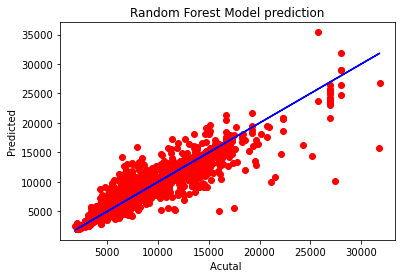

In [134]:
## plotting graph
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('Random Forest Model prediction')

## KNN Model Tunning:

In [112]:
#### For KNN Model:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=25)
KNeighborsRegressor().fit(x_train,y_train)

KNeighborsRegressor()

In [117]:
params={'algorithm':['kd_tree','brute','auto'],
        'weights' : ['uniform', 'distance'],
        'leaf_size':list(range(10,16)),
      'n_neighbors':[3,5,7]}

In [118]:
grid=GridSearchCV(KNeighborsRegressor(),params,cv=7,n_jobs=-1)

grid.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree', 'brute', 'auto'],
                         'leaf_size': [10, 11, 12, 13, 14, 15],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [119]:
print(grid.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 14, 'n_neighbors': 3, 'weights': 'distance'}


In [120]:
knn=KNeighborsRegressor(algorithm='kd_tree',leaf_size=14,n_neighbors=3,weights='distance')
knn.fit(x_train,y_train)
knn.predict(x_train)
pred=knn.predict(x_test)
score=r2_score(y_test,pred)
print("************************KNN Model***************************")
print("\n KNeighbors Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,pred))
print("\nMean Abosute Erros is : ",MAE(y_test,pred))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,pred)))

************************KNN Model***************************

 KNeighbors Regressor R2 Score is :  0.8435887223468048

Mean Squared Erros is :  2968897.0996177527

Mean Abosute Erros is :  887.2226567604894

Root Mean Squared Error is:  1723.0487803941455


Text(0.5, 1.0, 'KNN Model prediction')

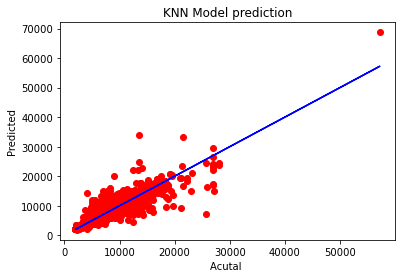

In [121]:
## plotting graph
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('KNN Model prediction')

## XGB Parameter tunning:

In [123]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [124]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.25,random_state=25)
grid_param={'learning_rate':[0.0001,0.001,0.01,0.1,1],
           'max_depth':list(range(3,8)),
           'min_child_weight':[3,5,7,9],
           'gamma':[0.1,0.001,0.2,0.3,0.4,0.5,0.6,0.7],
           'colsample_bytree':[0.3,0.5,0.7]}

In [128]:
GridSearch=RandomizedSearchCV(XGBRegressor(),grid_param,cv=7)
GridSearch.fit(x_train,y_train)

RandomizedSearchCV(cv=7,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [129]:
GridSearch.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.7,
 'colsample_bytree': 0.3}

In [131]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=6,min_child_weight=7,gamma=0.7,colsample_bytree=0.3)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("************************XGB Model***************************")
print("\n XGB Regressor R2 Score is : ",r2score)
print("\nMean Squared Erros is : ",MSE(y_test,y_pred))
print("\nMean Abosute Erros is : ",MAE(y_test,y_pred))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,y_pred)))

************************XGB Model***************************

 XGB Regressor R2 Score is :  0.8512061012859716

Mean Squared Erros is :  2824308.969027033

Mean Abosute Erros is :  1084.727821138822

Root Mean Squared Error is:  1680.568049507973


## `Random Forest` Gives us The best Accuracy. We will finalize it as the Best fit Model.


In [137]:
##for random forest
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=9)
RandomForestRegressor().fit(x_train,y_train)
rf=RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=1)
rf.fit(x_train,y_train)
rf.predict(x_train)
y_pred=rf.predict(x_test)
score=r2_score(y_test,y_pred)
print("\nRandom Forest Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,y_pred))
print("\nMean Abosute Erros is : ",MAE(y_test,y_pred))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,y_pred)))


Random Forest Regressor R2 Score is :  0.8803176771148216

Mean Squared Erros is :  2355911.934218264

Mean Abosute Erros is :  852.2155474717642

Root Mean Squared Error is:  1534.8980207877864


## Saving the model:

In [138]:
import joblib
joblib.dump(rf,'Flight_Price_Prediction')

['Flight_Price_Prediction']

# Test Data set:
### We will find Price for test dataset:

In [140]:
## importing dataset:
df2=pd.read_excel('Test_set.xlsx')
df2.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [141]:
### df2.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [142]:
df2.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [144]:
### checking the value count:
for i in df2.columns:
    if df2[i].dtypes=='object':
        print(i)
        print(df2[i].value_counts())
        print("\n**************************************************************************\n")

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

**************************************************************************

Date_of_Journey
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
24/03/2019     78
1/04/2019      78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
1/05/2019      62
3/03/2019      62
9/03/2

In [146]:
## replacing least count attributes with others:
df2['Additional_Info'].replace({'Change airports':'Others',
                                    'Business class':'Others'},inplace=True)

df2.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Others                             2
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [148]:
df2['Journey_Day']=pd.to_datetime(df2['Date_of_Journey'],format="%d/%m/%Y").dt.day
df2['Journey_Month']=pd.to_datetime(df2['Date_of_Journey'],format="%d/%m/%Y").dt.month

#### may be the year for  journey date is unique>> 
## let's extract first if it is unique then we will drop it
df2['Journey_Year']=pd.to_datetime(df2['Date_of_Journey'],format="%d/%m/%Y").dt.year




In [149]:
### extracting hours
hours=[]
for i in df2.Duration:
    hours.append(i.split('h')[0])
print(len(hours))
## adding it into dataframe
df2['Duration_Hours']=hours

df2.Duration_Hours=df2['Duration_Hours'].replace('5m',np.nan)
df2.dropna(inplace=True)

### extracting minutes:
minutes=[]
for i in df2.Duration:
    if len(i)>=4:               ## checking if time has minutes present or not
        minutes.append(i.split(' ')[-1].replace('m',''))
    else:
        minutes.append('0')
print(len(minutes))
df2['Duration_Minutes']=minutes

### Converting duration time into total hours:

df2['Duration_Hours']=df2['Duration_Hours'].astype(int)
df2['Duration_Minutes']=df2['Duration_Minutes'].astype(int)
## creating new column
df2['Duration_Total_Hours']=df2['Duration_Hours']+df2['Duration_Minutes']/60 ### converting minute into Hours


2671
2670


In [150]:
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Year,Duration_Hours,Duration_Minutes,Duration_Total_Hours
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,10,55,10.916667
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019,4,0,4.000000
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019,23,45,23.750000
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019,13,0,13.000000
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019,2,50,2.833333


In [152]:
df2['Arrival_Time_Hour']=pd.to_datetime(df2.Arrival_Time).dt.hour
df2['Arrival_Time_Minute']=pd.to_datetime(df2.Arrival_Time).dt.minute

### Dep_Time:
#Similarly we will extract time from this column:

df2['Dep_Time_Hour']=pd.to_datetime(df2.Dep_Time).dt.hour
df2['Dep_Time_Minute']=pd.to_datetime(df2.Dep_Time).dt.minute

df2.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],inplace=True)
#df2.head()

#df2.Journey_Year.unique()

### year is unique so we will drop it as well
df2.drop('Journey_Year',axis=1,inplace=True)

### Duration_minutes and Duration_hours are useless as we already add both columns and make new column Duration_Total_hours
## so we will also drop them 
df2.drop(columns=['Duration_Hours','Duration_Minutes'],inplace=True)
#df.head()

### checking dtype
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airline               2670 non-null   object 
 1   Source                2670 non-null   object 
 2   Destination           2670 non-null   object 
 3   Total_Stops           2670 non-null   object 
 4   Additional_Info       2670 non-null   object 
 5   Journey_Day           2670 non-null   int64  
 6   Journey_Month         2670 non-null   int64  
 7   Duration_Total_Hours  2670 non-null   float64
 8   Arrival_Time_Hour     2670 non-null   int64  
 9   Arrival_Time_Minute   2670 non-null   int64  
 10  Dep_Time_Hour         2670 non-null   int64  
 11  Dep_Time_Minute       2670 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 271.2+ KB


In [154]:
from scipy.stats import zscore
z_score=zscore(df2[['Duration_Total_Hours','Dep_Time_Minute','Dep_Time_Hour',
                         'Arrival_Time_Hour','Arrival_Time_Minute']])
abs_zscore=np.abs(z_score)



threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df2_new=df2[new_entry]
print("The shape before: ", df2.shape)
print("The shape after: ",df2_new.shape)

### Data loss

loss=(10461-10400)/10400*100
print("for removing the  outliers our data loss is : ",round(loss,1),'%')

##The data loss is very less, Let's move ahead.

## Checking Skewness:-

df2_new.skew()

## Handling only continous type feature:
df2_new.Duration_Total_Hours=np.sqrt(df2_new['Duration_Total_Hours'])
print(df2_new.skew())

The shape before:  (2670, 12)
The shape after:  (2652, 12)
for removing the  outliers our data loss is :  0.6 %
Journey_Day             0.195074
Journey_Month          -0.412562
Duration_Total_Hours    0.311140
Arrival_Time_Hour      -0.432121
Arrival_Time_Minute     0.110099
Dep_Time_Hour           0.083948
Dep_Time_Minute         0.133412
dtype: float64


In [155]:
dfx=pd.get_dummies(df2_new[['Airline','Source','Destination','Total_Stops','Additional_Info']])
print(dfx.shape)
dfx.head(10)

### merge the dataframe and dropping unwanted columns:
df2=df2_new.join(dfx)
df2.drop(columns=['Airline','Source','Destination','Total_Stops','Additional_Info'],inplace=True)
#df2.head()

df2.shape

(2652, 32)


(2652, 39)

In [156]:
df2.head()

,Journey_Day,Journey_Month,Duration_Total_Hours,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Others
0,6,6,3.304038,4,25,17,30,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,12,5,2.000000,10,20,6,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,21,5,4.873397,19,0,19,15,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,21,5,3.605551,21,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,24,6,1.683251,2,45,23,55,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


## scaling
for i in df2.columns:
    df2[i]=scaler.fit_transform(df2[i].values.reshape(-1,1))
df2.head(10)

,Journey_Day,Journey_Month,Duration_Total_Hours,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Others
0,0.192308,1.000000,0.450988,0.173913,0.454545,0.739130,0.545455,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.423077,0.666667,0.181956,0.434783,0.363636,0.260870,0.363636,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.769231,0.666667,0.774758,0.826087,0.000000,0.826087,0.272727,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.769231,0.666667,0.513192,0.913043,0.000000,0.347826,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.884615,1.000000,0.116608,0.086957,0.818182,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.423077,1.000000,0.652696,0.521739,0.636364,0.782609,0.272727,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.423077,0.000000,0.570582,0.956522,0.636364,0.304348,0.545455,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.000000,0.666667,0.242051,0.869565,0.545455,0.652174,0.272727,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.538462,0.000000,0.111463,0.521739,1.000000,0.434783,0.181818,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.653846,0.666667,0.278186,0.956522,0.636364,0.695652,0.545455,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
### applying pca
pca=PCA(n_components=22)
new_df2_comp=pca.fit_transform(df2)
df2_comp=pd.DataFrame(new_df2_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                     'PC21','PC22'])
df2_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,1.048590,0.074656,0.265129,0.023973,-0.169756,-0.196411,0.079540,0.553833,-0.316023,0.365506,0.417432,-0.164139,-0.271189,0.385369,0.119346,0.138325,-0.046302,-0.097167,0.068106,-0.098991,0.058430,0.012722
1,-0.424194,0.771313,-0.975885,-0.641145,-0.247465,-0.024270,0.559161,-0.037037,0.050202,-0.208801,0.148044,0.026533,-0.306380,-0.310603,-0.018173,-0.175344,0.195218,0.078953,0.001834,0.038223,-0.057626,0.070281
2,1.182932,0.599251,1.114185,0.191091,-0.370474,0.005667,0.107128,-0.122325,0.144315,-0.332071,-0.355499,0.161411,-0.020482,0.243564,0.203532,0.052091,-0.242277,0.064126,0.009059,0.033673,0.003393,-0.052367
3,1.278092,-0.338187,-0.286833,-0.415067,-0.189278,-0.222774,-0.475615,-0.011729,0.212043,0.025245,-0.514069,0.345753,0.085180,-0.349556,-0.031266,-0.007310,0.036790,-0.054675,-0.034473,0.029026,0.034102,-0.018845
4,-1.212270,-0.918319,0.346839,-0.007665,-0.023338,-0.757291,-0.201470,-0.182960,-0.436435,0.283192,-0.017474,-0.908478,-0.311904,-0.014925,0.199482,0.246813,-0.421983,-0.023904,-0.000592,0.803576,0.125557,-0.128356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,-0.301117,1.016940,-1.051306,0.024679,0.388271,-0.248989,-0.409416,0.178959,0.074298,-0.669199,0.172850,-0.210408,-0.068987,0.257315,0.157200,0.156930,-0.153058,-0.108513,-0.158587,-0.078527,0.058229,-0.053956
2648,-1.252881,0.155282,-0.840790,-0.173936,-0.284887,0.290254,0.831318,-0.522313,0.254913,0.364720,-0.559357,-0.196387,0.295536,-0.022514,-0.027446,0.055637,0.075057,-0.230900,0.045500,-0.188124,0.027095,-0.048957
2649,0.953168,0.031626,0.365129,-0.204310,0.217695,0.385005,0.214166,0.205202,-0.457986,0.643743,0.309637,-0.188927,0.076962,0.463763,0.509169,0.130928,-0.087352,0.017764,-0.148447,-0.121130,0.022301,0.067442
2650,1.028159,-0.314214,-0.371526,-0.084730,0.586620,0.235450,-0.193916,-0.015139,0.619815,-0.289962,0.054873,0.234803,0.173748,0.486680,0.480850,-0.153131,0.478301,0.092222,0.061732,0.037628,0.036698,-0.003079


## Predicting Price using Random Forest Model:

In [159]:
test_score=rf.predict(df2_comp)

In [160]:
pred_price=pd.DataFrame({'Test Score':test_score})
pred_price

,Test Score
0,16298.800000
1,9636.155000
2,10294.569000
3,11243.069667
4,6227.023333
...,...
2647,11247.510000
2648,4584.305000
2649,11038.055000
2650,11618.530500
